<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Weather Data

## Imports And Data Loading

In [2]:
import pandas as pd
import numpy as np

In [153]:
weather = pd.ExcelFile('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\WeatherDataNew.xlsx')
weather9 = pd.read_excel(weather, sheetname='2009')
weather10 = pd.read_excel(weather, sheetname='2010', na_values=[' ', '-'])
weather11 = pd.read_excel(weather, sheetname='2011', na_values=[' ', '-'])
weather12 = pd.read_excel(weather, sheetname='2012', na_values=[' ', '-'])
weather13 = pd.read_excel(weather, sheetname='2013', na_values=[' ', '-'])
weather14 = pd.read_excel(weather, sheetname='2014', na_values=[' ', '-'])
weather15 = pd.read_excel(weather, sheetname='2015', na_values=[' ', '-'])

In [154]:
df_list = [weather9, weather10, weather11, weather12, weather13, weather14, weather15]

weatherData = pd.concat(df_list)
weatherData.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,...,1023.0,1015.0,16.0,16.0,16.0,37,18,60,0,NaN
1,2009,Jan,2,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,...,1012.0,1007.0,16.0,13.0,2.0,27,10,48,T,Snow
2,2009,Jan,3,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,...,1015.0,1008.0,16.0,16.0,16.0,27,16,42,T,NaN
3,2009,Jan,4,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,...,1017.0,1015.0,16.0,16.0,16.0,32,12,40,0,NaN
4,2009,Jan,5,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,...,1014.0,1013.0,16.0,16.0,16.0,23,11,34,T,NaN


In [6]:
weatherData.shape

(2922, 23)

## Preprocessing

### Dropping Day Column

In [7]:
weatherData_noDay = weatherData.copy().drop('Day', axis = 1)
weatherData_noDay.head()

,Year,Month,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,43.0,...,1023.0,1015.0,16.0,16.0,16.0,37,18,60,0,NaN
1,2009,Jan,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,57.0,...,1012.0,1007.0,16.0,13.0,2.0,27,10,48,T,Snow
2,2009,Jan,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,54.0,...,1015.0,1008.0,16.0,16.0,16.0,27,16,42,T,NaN
3,2009,Jan,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,42.0,...,1017.0,1015.0,16.0,16.0,16.0,32,12,40,0,NaN
4,2009,Jan,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,48.0,...,1014.0,1013.0,16.0,16.0,16.0,23,11,34,T,NaN


### Changing Column Names

In [8]:
weatherData_noDay.columns = ['Year', 'Month', 'Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)',
                        'Dew Point high (°C)', 'Dew Point avg (°C)', 'Dew Point low (°C)',
                       'Humidity_high', 'Humidity_avg', 'Humidity_low','Sea Level Press high', 'Sea Level Press avg',
                       'Sea Level Press low', 'Visibility (km) high','Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low',
                       'Wind (km/h) avg', 'Wind (km/h) high', 'Precip (mm) sum','WeatherEvent']

### Convert Dtypes Of Columns

In [9]:
weatherData_noDay.dtypes

Year                      int64
Month                    object
Temp high (°C)          float64
Temp avg (°C)           float64
Temp low (°C)           float64
Dew Point high (°C)     float64
Dew Point avg (°C)      float64
Dew Point low (°C)      float64
Humidity_high           float64
Humidity_avg            float64
Humidity_low            float64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low          object
Wind (km/h) avg          object
Wind (km/h) high         object
Precip (mm) sum          object
WeatherEvent             object
dtype: object

### Replace T value With 0.01 in Precip (mm) sum Column

In [14]:
weatherData_noDay['Precip (mm) sum'].isnull().sum()

1

In [15]:
weatherData_noDay['Precip (mm) sum'] =   weatherData_noDay['Precip (mm) sum'].apply(lambda x: 0.01 if x == 'T' else x)  
weatherData_noDay['Precip (mm) sum'].isnull().sum()

1

In [16]:
weatherData_noDay.iloc[:, 2:-1] = weatherData_noDay.iloc[:, 2:-1].apply(pd.to_numeric, errors = 'coerce')

In [17]:
weatherData_noDay.dtypes

Year                      int64
Month                    object
Temp high (°C)          float64
Temp avg (°C)           float64
Temp low (°C)           float64
Dew Point high (°C)     float64
Dew Point avg (°C)      float64
Dew Point low (°C)      float64
Humidity_high           float64
Humidity_avg            float64
Humidity_low            float64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low         float64
Wind (km/h) avg         float64
Wind (km/h) high        float64
Precip (mm) sum         float64
WeatherEvent             object
dtype: object

### Filling Missing Values

In [17]:
weatherData_noDay.isnull().sum()/len(weatherData_noDay)*100

Year                     0.000000
Month                    0.000000
Temp high (°C)           0.068446
Temp avg (°C)            0.068446
Temp low (°C)            0.068446
Dew Point high (°C)      0.068446
Dew Point avg (°C)       0.068446
Dew Point low (°C)       0.068446
Humidity_high            0.068446
Humidity_avg             0.068446
Humidity_low             0.068446
Sea Level Press high     0.650240
Sea Level Press avg      0.650240
Sea Level Press low      0.650240
Visibility (km) high     0.958248
Visibility (km) avg      0.958248
Visibility (km) low      0.958248
Wind (km/h) low          0.684463
Wind (km/h) avg          0.684463
Wind (km/h) high         2.019165
Precip (mm) sum          0.034223
WeatherEvent            65.297741
dtype: float64

In [44]:
weatherData_noDay['WeatherEvent'] = weatherData_noDay['WeatherEvent'].fillna('Other')
weatherData_noDay.isnull().sum()/len(weatherData_noDay)*100

Year                    0.000000
Month                   0.000000
Temp high (°C)          0.068446
Temp avg (°C)           0.068446
Temp low (°C)           0.068446
Dew Point high (°C)     0.068446
Dew Point avg (°C)      0.068446
Dew Point low (°C)      0.068446
Humidity_high           0.068446
Humidity_avg            0.068446
Humidity_low            0.068446
Sea Level Press high    0.650240
Sea Level Press avg     0.650240
Sea Level Press low     0.650240
Visibility (km) high    0.958248
Visibility (km) avg     0.958248
Visibility (km) low     0.958248
Wind (km/h) low         0.684463
Wind (km/h) avg         0.684463
Wind (km/h) high        2.019165
Precip (mm) sum         0.034223
WeatherEvent            0.000000
dtype: float64

In [115]:
# for i in weatherData_noDay.columns:
#     if weatherData_noDay[i].dtype == 'float64':
#         pd.DataFrame(imputer_mode.fit_transform(weatherData_noDay[[i]]))

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean')

num_cols = weatherData_noDay.select_dtypes(include=['float64'])
labels = num_cols.columns
num_cols = pd.DataFrame(imputer.fit_transform(num_cols),columns=labels)

print(len(num_cols.columns))
num_cols.isnull().any()

19


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Temp high (°C)          False
Temp avg (°C)           False
Temp low (°C)           False
Dew Point high (°C)     False
Dew Point avg (°C)      False
Dew Point low (°C)      False
Humidity_high           False
Humidity_avg            False
Humidity_low            False
Sea Level Press high    False
Sea Level Press avg     False
Sea Level Press low     False
Visibility (km) high    False
Visibility (km) avg     False
Visibility (km) low     False
Wind (km/h) low         False
Wind (km/h) avg         False
Wind (km/h) high        False
Precip (mm) sum         False
dtype: bool

In [18]:
obj_cols = weatherData_noDay.select_dtypes(include = ['object'])
obj_cols.isnull().sum()

In [127]:
obj_cols = weatherData_noDay.select_dtypes(include = ['object'])
obj_cols['WeatherEvent'] = obj_cols['WeatherEvent'].fillna('Other')
print(obj_cols.isnull().sum())

## Extracting New Features

In [18]:
weatherData_final = weatherData_noDay.copy()

In [19]:
col_list = ['Year', 'Month', 'Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)','Dew Point high (°C)', 'Dew Point avg (°C)', 
            'Dew Point low (°C)','Humidity_high', 'Humidity_avg', 'Humidity_low', 'Sea Level Press high','Sea Level Press avg',
            'Sea Level Press low', 'Visibility (km) high','Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low',
            'Wind (km/h) avg', 'Wind (km/h) high', 'Precip (mm) sum','WeatherEvent']

In [33]:
features = {col_list[2]:['min','max','mean','var'],col_list[3]:['min','max','mean','var'],col_list[4]:['min','max','mean','var'],
           col_list[5]:['min','max','mean','var'], col_list[6]:['min','max','mean','var'], col_list[7]:['min','max','mean','var'],
           col_list[8]:['min','max','mean','var'], col_list[9]:['min','max','mean','var'], col_list[10]:['min','max','mean','var'],
col_list[11]:['min','max','mean','var'], col_list[12]:['min','max','mean','var'], col_list[13]:['min','max','mean','var'],
col_list[14]:['min','max','mean','var'], col_list[15]:['min','max','mean','var'], col_list[16]:['min','max','mean','var'],
col_list[17]:['min','max','mean','var'], col_list[18]:['min','max','mean','var'], col_list[19]:['min','max','mean','var']}

weather_features = weatherData_final.groupby(['Year','Month']).agg(features).reset_index()

In [34]:
weather_features.tail(12)

Year Month Temp high (°C)                             Temp avg (°C)        \
                          min   max       mean        var           min   max   
84  2016   Apr            6.0  28.0  16.800000  36.924138           2.0  22.0   
85  2016   Aug           26.0  36.0  30.354839   6.169892          22.0  32.0   
86  2016   Dec           -3.0  16.0   6.548387  17.722581          -6.0  10.0   
87  2016   Feb           -9.0  16.0   7.103448  50.524631         -14.0  12.0   
88  2016   Jan           -3.0  15.0   4.870968  20.249462          -7.0  10.0   
89  2016   Jul           22.0  36.0  30.129032  11.449462          21.0  31.0   
90  2016   Jun           19.0  31.0  27.100000  11.127586          16.0  27.0   
91  2016   Mar            2.0  26.0  14.161290  36.673118          -1.0  22.0   
92  2016   May           11.0  33.0  21.258065  45.197849           9.0  28.0   
93  2016   Nov            5.0  22.0  13.633333  19.826437           3.0  18.0   
94  2016   Oct           11.0  29.0  18.774194  21.780645           7.0  24.0   
95  2016   Sep           15.0  33.0  26.166667  19.040230          14.0  28.0   

                             ...     Wind (km/h) low              \
         mean        var     ...                mean         var   
84  11.966667  27.067816     ...           26.633333  355.481609   
85  26.354839   5.303226     ...           17.931034   20.137931   
86   3.645161  14.636559     ...           24.677419   27.359140   
87   3.241379  43.118227     ...           26.965517   31.320197   
88   1.483871  18.058065     ...           26.354839   40.103226   
89  26.064516   6.662366     ...           19.387097   19.711828   
90  22.433333   6.322989     ...           20.500000   35.844828   
91   9.483871  25.391398     ...           27.225806   51.913978   
92  17.193548  31.894624     ...           19.250000   31.527778   
93   9.866667  13.154023     ...           22.300000   44.837931   
94  14.967742  18.832258     ...           20.580645   41.851613   
95  22.133333  12.809195     ...           20.433333   29.357471   

   Wind (km/h) avg                             Wind (km/h) high        \
               min   max       mean        var              min   max   
84             5.0  20.0  10.066667  12.133333             23.0  72.0   
85             2.0  11.0   5.931034   4.709360             18.0  53.0   
86             5.0  18.0   9.870968  10.316129             26.0  64.0   
87             6.0  24.0  11.793103  16.527094             27.0  64.0   
88             4.0  25.0  11.225806  20.313978             27.0  68.0   
89             3.0  10.0   6.258065   3.197849             18.0  56.0   
90             2.0  14.0   6.933333   9.995402             16.0  61.0   
91             4.0  23.0  10.612903  19.511828             24.0  72.0   
92             2.0  14.0   6.928571   9.328042             19.0  50.0   
93             3.0  21.0   8.400000  15.489655             21.0  63.0   
94             2.0  17.0   7.419355  13.384946             18.0  58.0   
95             3.0  18.0   7.833333  15.729885             19.0  50.0   

                           
         mean         var  
84  38.366667  117.619540  
85  30.888889   54.948718  
86  40.000000   84.275862  
87  44.103448  122.024631  
88  42.566667  111.219540  
89  32.806452   58.627957  
90  33.700000  126.906897  
91  43.516129  166.124731  
92  32.960000   68.123333  
93  36.800000  146.579310  
94  34.612903  153.511828  
95  33.655172   67.519704  

[12 rows x 74 columns]

In [36]:
weather_features.columns

MultiIndex(levels=[['Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point avg (°C)', 'Dew Point low (°C)', 'Humidity_high', 'Humidity_avg', 'Humidity_low', 'Sea Level Press high', 'Sea Level Press avg', 'Sea Level Press low', 'Visibility (km) high', 'Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low', 'Wind (km/h) avg', 'Wind (km/h) high', 'Month', 'Year'], ['min', 'max', 'mean', 'var', '']],
           labels=[[19, 18, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17], [4, 4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [37]:
print(weather_features.shape)
print(np.max(weather_features['Temp high (°C)']))
np.min(weather_features['Temp high (°C)'])

(96, 74)
min     27.000000
max     40.000000
mean    32.258065
var     50.524631
dtype: float64


min    -9.000000
max     6.000000
mean    0.000000
var     3.406452
dtype: float64

In [39]:
weatherData_final1 = weather_features.copy()
weatherData_final.columns = [x[0]+"_"+x[1] for x in weatherData_noDay.columns]

In [1]:
weatherData_final1.head()

NameError: name 'weatherData_final1' is not defined

In [46]:
for i in weatherData_final1.columns:
    print(i[0]+i[1])

Year
Month
Temp high (°C)min
Temp high (°C)max
Temp high (°C)mean
Temp high (°C)var
Temp avg (°C)min
Temp avg (°C)max
Temp avg (°C)mean
Temp avg (°C)var
Temp low (°C)min
Temp low (°C)max
Temp low (°C)mean
Temp low (°C)var
Dew Point high (°C)min
Dew Point high (°C)max
Dew Point high (°C)mean
Dew Point high (°C)var
Dew Point avg (°C)min
Dew Point avg (°C)max
Dew Point avg (°C)mean
Dew Point avg (°C)var
Dew Point low (°C)min
Dew Point low (°C)max
Dew Point low (°C)mean
Dew Point low (°C)var
Humidity_highmin
Humidity_highmax
Humidity_highmean
Humidity_highvar
Humidity_avgmin
Humidity_avgmax
Humidity_avgmean
Humidity_avgvar
Humidity_lowmin
Humidity_lowmax
Humidity_lowmean
Humidity_lowvar
Sea Level Press highmin
Sea Level Press highmax
Sea Level Press highmean
Sea Level Press highvar
Sea Level Press avgmin
Sea Level Press avgmax
Sea Level Press avgmean
Sea Level Press avgvar
Sea Level Press lowmin
Sea Level Press lowmax
Sea Level Press lowmean
Sea Level Press lowvar
Visibility (km) highmin
V

In [47]:
weatherData_final1.columns = [i[0]+'_'+i[1] for i in weatherData_final.columns]
weatherData_final1.head()

ValueError: Length mismatch: Expected axis has 74 elements, new values have 22 elements

In [48]:
print(weatherData_final.shape)
weatherData_final1.shape

(2922, 22)


(96, 74)

In [ ]:
################################# ----------------------------------------------------- #####################################

# Events_HolidaysData

In [1]:
from datetime import date
from datetime import datetime
import dateutil
import pandas as pd
from pandas import *
import numpy as np

In [2]:
data = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\Events_HolidaysData.xlsx')
data.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [136]:
holiday_data = data.loc[0:129, ]
holiday_data.tail()

,Year,MonthDate,Event,DayCategory
125,2015,2026-11-01,Thanksgiving Day,Federal Holiday
126,2015,2024-12-01,Christmas Eve,Event
127,2015,2025-12-01,Christmas Day,Federal Holiday
128,2015,2026-12-01,Day After Christmas Day,Event
129,2015,1931-12-01,New Year's Eve,Event


In [3]:
holiday_data.MonthDate = holiday_data.MonthDate.astype(str).str[2:7]
holiday_data.head()

,Year,MonthDate,Event,DayCategory
0,2009,01-01,New Year's Day,Federal Holiday
1,2009,19-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,14-02,Valentine's Day,Event
3,2009,16-02,Presidents' Day,Federal Holiday
4,2009,12-04,Easter Sunday,Event


In [6]:
print('Hape Of DataFrame', holiday_data.shape)
holiday_data.dtypes

NameError: name 'holiday_data' is not defined

In [5]:
print(holiday_data.Year.unique(), '\n')
print(np.min(holiday_data.MonthDate), '\n')
print(np.max(holiday_data.MonthDate), '\n')
print(len(holiday_data.Event.unique()), '\n')
print(holiday_data.DayCategory.unique())

[2009 2010 2011 2012 2013 2014 2015 2016] 

01-01 

31-12 

23 

['Federal Holiday' 'Event']


### Extract Month & Day From MonthDate Column

In [6]:
holiday_data['Month'] = holiday_data['MonthDate'].str[3:5]
holiday_data['Day'] = holiday_data['MonthDate'].str[0:2]

holiday_data.head(10)

,Year,MonthDate,Event,DayCategory,Month,Day
0,2009,01-01,New Year's Day,Federal Holiday,01,01
1,2009,19-01,Martin Luther King Jr. Day,Federal Holiday,01,19
2,2009,14-02,Valentine's Day,Event,02,14
3,2009,16-02,Presidents' Day,Federal Holiday,02,16
4,2009,12-04,Easter Sunday,Event,04,12
5,2009,10-05,Mother's Day,Event,05,10
6,2009,25-05,Memorial Day,Federal Holiday,05,25
7,2009,21-06,Father's Day,Event,06,21
8,2009,03-07,'Independence Day' observed,Federal Holiday,07,03
9,2009,04-07,Independence Day,Federal Holiday,07,04


### Column TypeCasting

In [10]:
holiday_data[['Year']] = holiday_data['Year'].apply(to_numeric)
holiday_data[['Month']] = holiday_data['Month'].apply(to_numeric)
holiday_data[['Day']] = holiday_data['Day'].apply(to_numeric)

In [8]:
holiday_count = holiday_data.groupby(['Year', 'Month']).agg('count').reset_index()
holiday_count.columns = ['Year', 'Month', 'MonthDate', 'Event', 'DayCategory', 'Day']
holiday_count.head()

,Year,Month,MonthDate,Event,DayCategory,Day
0,2009,1,2,2,2,2
1,2009,2,2,2,2,2
2,2009,4,1,1,1,1
3,2009,5,2,2,2,2
4,2009,6,1,1,1,1


In [24]:
holiday_pivot = pivot_table(holiday_data, values = ['Day'], index = ['Year', 'Month'], columns = ['DayCategory'], 
                            aggfunc=np.count_nonzero, fill_value=0)
holiday_pivot.head()

Day                
DayCategory Event Federal Holiday
Year Month                       
2009 1          0               2
     2          1               1
     4          1               0
     5          1               1
     6          1               0

In [97]:
holiday_pivot.columns = ['Event', 'Federal Holiday']
holiday_pivot.head()

Event  Federal Holiday
Year Month                        
2009 1          0                2
     2          1                1
     4          1                0
     5          1                1
     6          1                0

In [115]:
holiday_pivot['Event_Yes_No'] = holiday_pivot['Event'].apply(lambda x: 'No' if x==0 else 'Yes')
holiday_pivot['Federal Holiday_Yes_No'] = holiday_pivot['Federal Holiday'].apply(lambda x: 'No' if x==0 else 'Yes')

In [116]:
holiday_pivot.head()

Event  Federal Holiday Event_Yes_No Federal Holiday_Yes_No
Year Month                                                            
2009 1          0                2           No                    Yes
     2          1                1          Yes                    Yes
     4          1                0          Yes                     No
     5          1                1          Yes                    Yes
     6          1                0          Yes                     No

In [117]:
holiday_pivot.to_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD_Reshaped_Data\\holiday_data.csv')

In [ ]:
################################# ----------------------------------------------------- #####################################

# MacroEconomicData

## Import Packages and Load Data

In [22]:
import pandas as pd
from pandas import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [148]:
microEconomincData = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\MacroEconomicData.xlsx', 
                             na_values=['?', ' '], parse_dates=['Year-Month'])
print(economincData.shape)
economincData.head()

(96, 17)


,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


In [152]:
economincData = microEconomincData.loc[0:83,]   # Selecting till 2015 only.

## EDA and Preprocessing

In [150]:
economincData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 18 columns):
Year-Month                                                           84 non-null datetime64[ns]
Monthly Nominal GDP Index (inMillion$)                               84 non-null float64
Monthly Real GDP Index (inMillion$)                                  84 non-null float64
CPI                                                                  84 non-null float64
PartyInPower                                                         84 non-null object
unemployment rate                                                    84 non-null float64
CommercialBankInterestRateonCreditCardPlans                          84 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    84 non-null float64
Earnings or wages  in dollars per hour                               84 non-null float64
AdvertisingExpenses (in Thousand Dollars)                            11 non-null float64
C

### Checking Null Values and unique values

In [26]:
print(economincData.PartyInPower.unique())
economincData['AdvertisingExpenses (in Thousand Dollars)'].isnull().sum()/len(economincData)*100

['Democrats']


88.54166666666666

### Extract Month and Year Columns 

In [32]:
economincData['Year'] = economincData['Year-Month'].dt.year
economincData['Month'] = economincData['Year-Month'].dt.month
economincData.tail(1)

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
95,2016-12-01,19015.393408,16918.050624,265.421,4.7,12.41,9.45,25.9,NaN,79.5,0.73,9.95,9.464,810,15.962,3.275,11.6,2016,12


### Drop Unnecessary Columns [ PartyInPower, Year-Month ]

In [95]:
economincData = economincData.drop('PartyInPower', axis=1)    # Contains Only One Value In It.
economincData = economincData.drop('Year-Month', axis=1)      # Date and Month are Seperated as New Columns
economincData=economincData.drop('AdvertisingExpenses (in Thousand Dollars)',axis=1)# Do not have proper correlation and had 85% nulls. 

### Outliers Identification In Numeric Variables

In [64]:
num_cols = economincData.iloc[:, 0:-2]
labels = num_cols.columns
scale = MinMaxScaler()
num_cols_scaled = pd.DataFrame(scale.fit_transform(num_cols), columns=labels)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


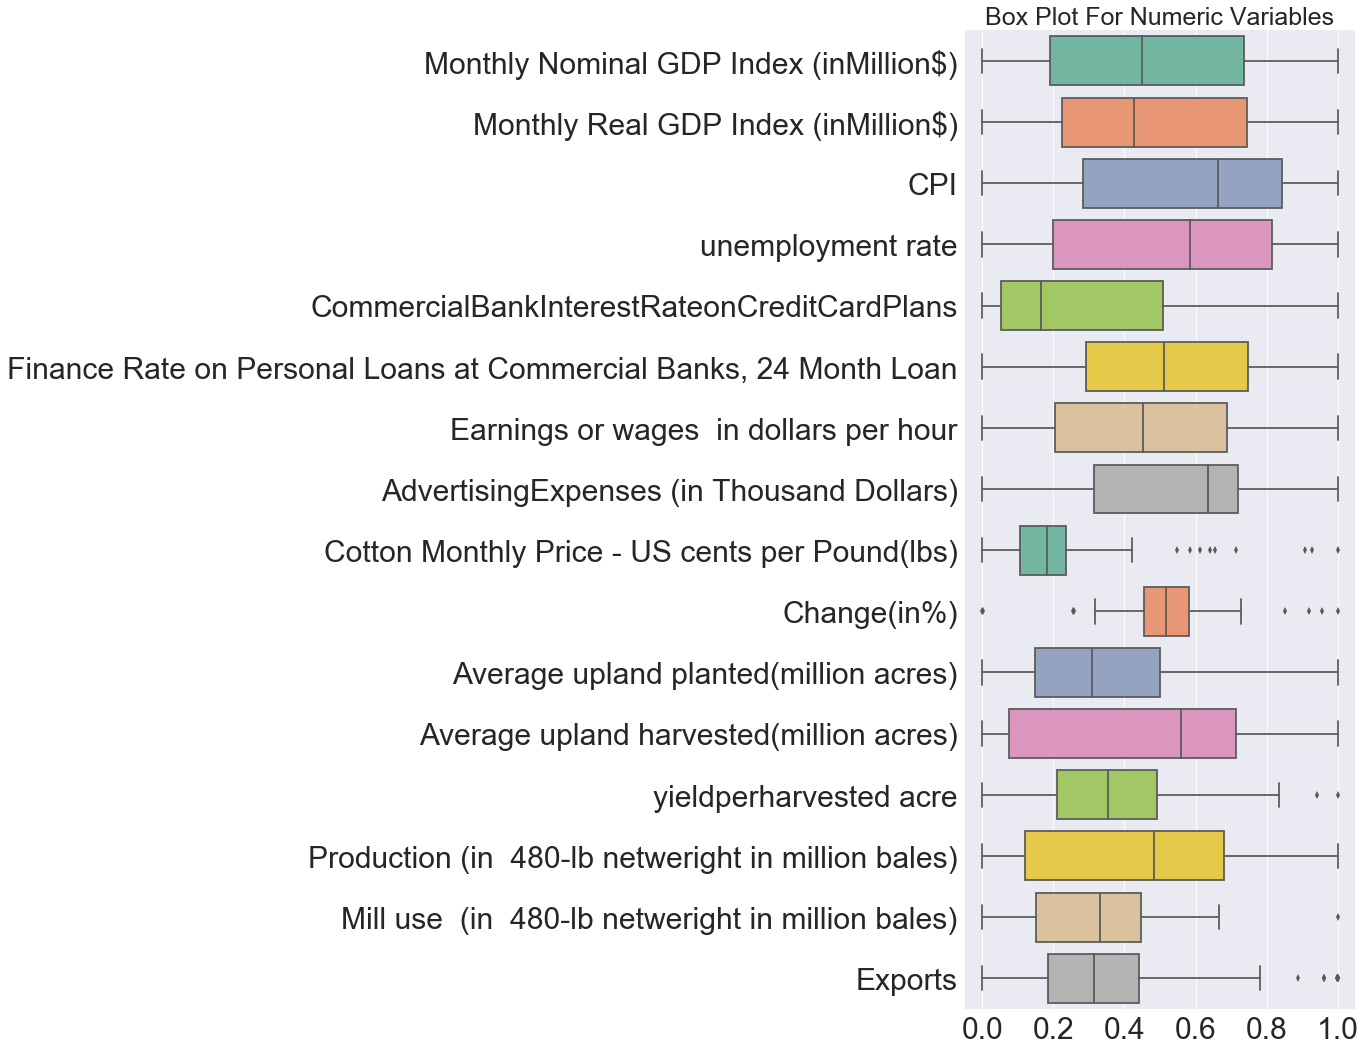

In [79]:
fig, ax = plt.subplots(figsize = (7,18))
sns.boxplot(data = num_cols_scaled, orient='h', palette='Set2')
sns.set(font_scale=2)
ax.set_title('Box Plot For Numeric Variables', fontsize = 25)
plt.show()

### Finding Correlations

In [80]:
corr = num_cols.corr()
corr.style.background_gradient()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
Monthly Nominal GDP Index (inMillion$),1,0.998172,0.96048,-0.968858,-0.692419,-0.876749,0.988787,0.0593766,-0.272993,-0.166678,-0.153269,0.00891943,-0.168514,-0.0426565,0.189205,-0.481074
Monthly Real GDP Index (inMillion$),0.998172,1,0.947941,-0.963478,-0.662976,-0.871271,0.985913,0.0229157,-0.269207,-0.156784,-0.162988,0.020919,-0.180834,-0.0340714,0.187837,-0.467733
CPI,0.96048,0.947941,1,-0.900765,-0.795135,-0.846721,0.944291,0.179935,-0.191042,-0.242878,0.0175807,0.0460786,-0.103006,0.00805496,0.12777,-0.47817
unemployment rate,-0.968858,-0.963478,-0.900765,1,0.703564,0.857594,-0.961626,-0.0366132,0.380495,0.163166,0.259871,0.106316,0.181514,0.151201,-0.299469,0.542009
CommercialBankInterestRateonCreditCardPlans,-0.692419,-0.662976,-0.795135,0.703564,1,0.584349,-0.661892,-0.227777,0.273789,0.329669,-0.269508,-0.0147015,0.0397724,0.00459624,-0.277667,0.509359
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",-0.876749,-0.871271,-0.846721,0.857594,0.584349,1,-0.878674,0.0997754,0.317272,0.0343401,0.222689,0.147924,0.0305712,0.145654,-0.0500459,0.436311
Earnings or wages in dollars per hour,0.988787,0.985913,0.944291,-0.961626,-0.661892,-0.878674,1,0.0863574,-0.261738,-0.124136,-0.178055,-0.0213891,-0.188228,-0.0759291,0.152471,-0.478522
AdvertisingExpenses (in Thousand Dollars),0.0593766,0.0229157,0.179935,-0.0366132,-0.227777,0.0997754,0.0863574,1,-0.0593368,-0.419861,0.238308,0.0330516,-0.175949,-0.011979,-0.226883,-0.329424
Cotton Monthly Price - US cents per Pound(lbs),-0.272993,-0.269207,-0.191042,0.380495,0.273789,0.317272,-0.261738,-0.0593368,1,0.128596,0.337989,0.516914,0.244098,0.535052,0.017528,0.718047
Change(in%),-0.166678,-0.156784,-0.242878,0.163166,0.329669,0.0343401,-0.124136,-0.419861,0.128596,1,-0.232607,0.0130916,0.153243,0.0382087,-0.27015,0.2979
